1- get the performance of FL : global model accuracy through  rounds

34     56.25
67     76.09
98     84.59
129    86.09
162    83.57
194    83.75
226    86.88
257    86.88
287    83.39
321    86.88
354    83.57
387    86.88
419    83.57
455    86.74
487    86.74
521    81.06
556    86.74
589    86.74
624    86.88
655    86.88
685    84.66
717    85.53
747    86.88
779    86.88
812    84.66
843    86.74
875    83.57
910    86.74
942    86.88
977    86.74
Name: accuracy, dtype: float64
35     59.76
70     78.18
100    87.80
134    88.41
167    88.18
197    88.41
227    89.02
257    88.41
288    89.02
318    89.02
347    89.02
374    89.02
405    89.09
434    89.02
468    82.76
503    87.50
538    89.02
572    89.02
603    89.02
631    89.09
660    89.02
688    89.02
717    93.18
749    89.02
781    89.02
808    89.02
838    89.02
870    89.02
902    89.02
930    89.02
Name: accuracy, dtype: float64
35     50.00
61     77.27
88     80.00
112    89.39
138    90.91
163    90.15
180    90.15
206    90.00
229    90.91
256    82.95
286    91.27
316    90.91
34

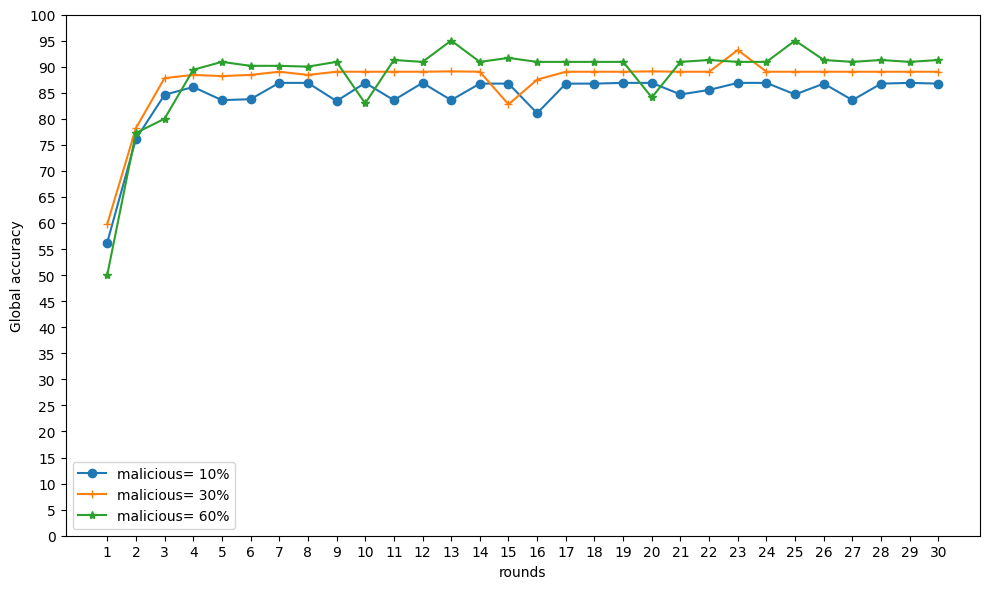

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df2 = pd.read_csv('../results/scenario2/drl_malicious10/models.csv') 
df5 = pd.read_csv('../results/scenario2/drl_malicious30/models.csv') 
df8 = pd.read_csv('../results/scenario2/drl_malicious60/models.csv')  # Replace 'your_csv_file.csv' with your actual file name
df52 = pd.read_csv('../results/scenario1/drl_50/models.csv') 
df55 = pd.read_csv('../results/scenario1/drl_150/models.csv') 
df58 = pd.read_csv('../results/scenario1/score_alpha08_nodes300/models.csv')  # Replace 'your_csv_file.csv' with your actual file name


# Filter rows with type=2
filtered_df2 = df2[df2['type'] == 2]
filtered_df2 = filtered_df2[1:]

filtered_df5 = df5[df5['type'] == 2]
filtered_df5 = filtered_df5[1:]

filtered_df8 = df8[df8['type'] == 2]
filtered_df8 = filtered_df8[1:]

filtered_df52 = df52[df52['type'] == 2]
filtered_df52 = filtered_df52[1:]

filtered_df55 = df55[df55['type'] == 2]
filtered_df55 = filtered_df55[1:]

filtered_df58 = df58[df58['type'] == 2]
filtered_df58 = filtered_df58[1:]

# Extract accuracy values
accuracies2 = filtered_df2['accuracy']
accuracies5 = filtered_df5['accuracy']
accuracies8 = filtered_df8['accuracy']

accuracies52 = filtered_df52['accuracy']
accuracies55 = filtered_df55['accuracy']
accuracies58 = filtered_df58['accuracy']

index =[]
for i in  range(1,len(filtered_df2['round'])+1):
    index.append(i)

print(accuracies2)
# print(accuracies52)

print(accuracies5)
# print(accuracies52)

print(accuracies8)
# print(accuracies55)
# print(accuracies)
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(index, accuracies2, marker='o', label="malicious= 10%")
plt.plot(index, accuracies5, marker='+', label="malicious= 30%")
plt.plot(index, accuracies8, marker='*', label="malicious= 60%")
# plt.plot(index, accuracies52, marker='o', label="nodes=50")
# plt.plot(index, accuracies55, marker='+', label="nodes=150")
# plt.plot(index, accuracies58, marker='*', label="α=0.8")
# plt.title('Convergence du modèle global avec sélection basée sur le score et avec 300 noeuds')
plt.xlabel('rounds')
plt.ylabel('Global accuracy')
plt.yticks(range(0, 101, 5))
plt.xticks(range(1,31, 1))
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
import json
import numpy as np
with open("../results/scenario1/drl_50/blockchain.json",'r') as f:
    data = json.load(f)

In [8]:
# Create a dictionary to store honesty values for each nodeId
honesty_values_dict = {}

# Iterate through the transactions of all blocks
for json_obj in data:
    for transaction in json_obj['Transactions']:
        if transaction['Content']['message_type'] == 1:
            node_id = transaction['Content']['nodeId']
            honesty = transaction['Content']['honesty']

            if node_id not in honesty_values_dict:
                honesty_values_dict[node_id] = []

            honesty_values_dict[node_id].append(honesty)

# Print honesty values for each node in a single line
for node_id in range(0, 50):  # Assuming node IDs are from 1 to 100
    if node_id in honesty_values_dict:
        honesty_list = honesty_values_dict[node_id]
        if len(honesty_list)==7 :
            honesty_list.append(honesty_list[-1])
        print(f"Node {node_id}: {honesty_list}")
    else:
        print(f"Node {node_id}: No honesty values")


Node 0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Node 1: [0.0, 0.0, 0.0, -10.0, -10.0, -8.5, -8.5, -8.5, -8.5, -8.5, -7.071, -17.070999999999998, -17.070999999999998, -17.571, -17.571, -27.571, -27.571, -25.904, -25.904, -25.904, -24.475, -24.6, -24.6, -24.6, -24.767, -24.767, -24.767, -34.766999999999996, -34.766999999999996, -34.766999999999996]
Node 2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Node 3: [0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, -8.0, -6.545, -6.545, -6.545, -6.545, -6.545, -10.434, -10.434, -10.434, -10.434, -10.434, -20.433999999999997, -20.433999999999997, -20.433999999999997, -20.433999999999997, -30.433999999999997, -30.433999999999997, -30.433999999999997, -30.433999999999997, -30.433999999999997, -36.734, -36.734]
Node 4: [0.0, 0.0, 0.0, 0.0, 0.0, 

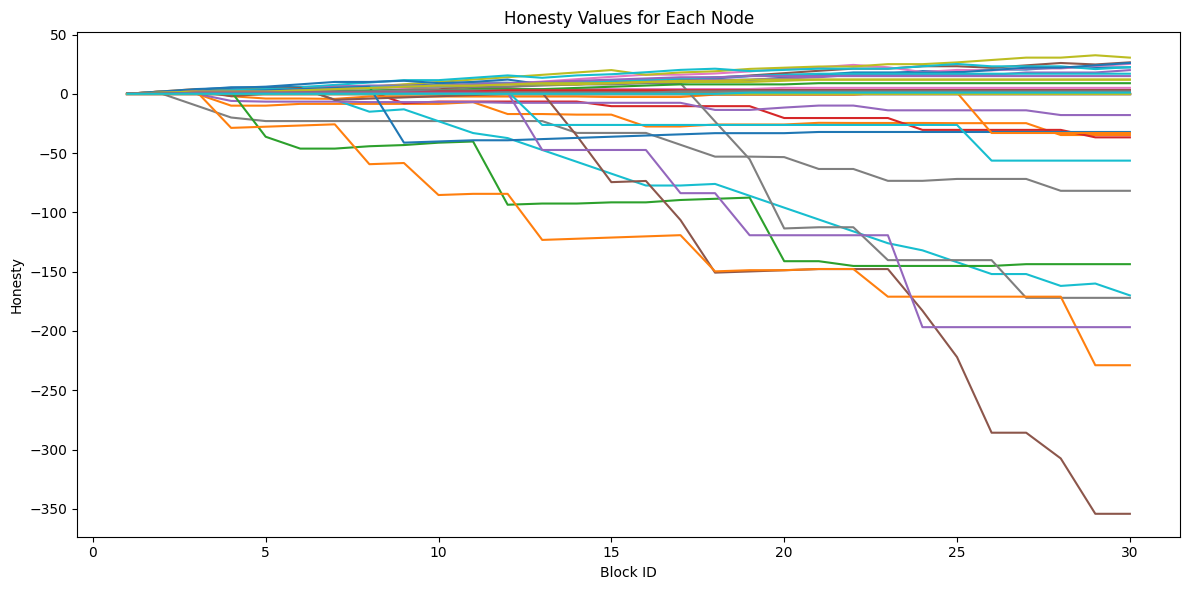

In [9]:
import matplotlib.pyplot as plt

# Specify the node IDs you want to include on the plot
# specific_node_ids = [11,17,38,37,77,95,86,97]  # Add the node IDs you want to display

# Prepare data for plotting
node_ids = sorted(honesty_values_dict.keys())

block_ids = [json_obj['BlockId'] for json_obj in data]
indices=[]
[indices.append(i) for i in range(1,len(block_ids)+1)]
plt.figure(figsize=(12, 6))

# Plot honesty values for each node
for node_id in node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(indices, honesty_values, label=f'Node {node_id}')

plt.xlabel('Block ID')
plt.ylabel('Honesty')
plt.title('Honesty Values for Each Node')
# plt.legend()
# plt.xticks(rotation=45)

# y_ticks = np.arange(-15, 11, 1)
# y_tick_labels = [f'{tick:.0f}' for tick in y_ticks]
# plt.yticks(y_ticks, y_tick_labels)
# plt.yscale('logit')
plt.tight_layout()

# Show or save the plot
plt.show()

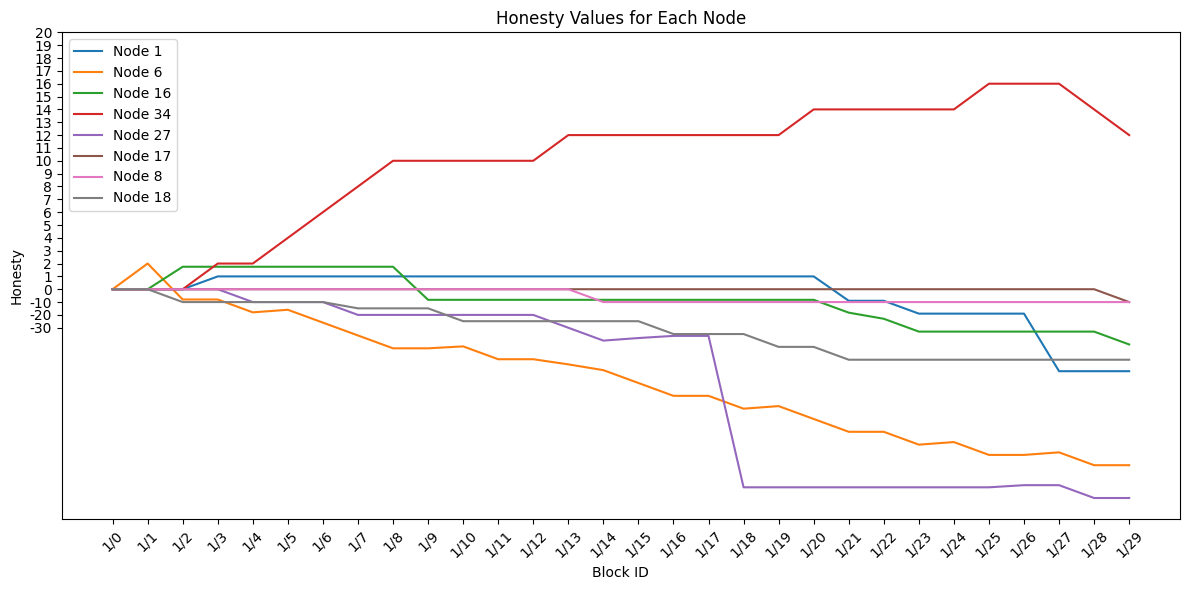

In [16]:
y = [-3, -2, -1, 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y_ticks = [-30, -20,-10, 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  # Custom y-axis tick values


def process_y_values(y_values):
    return [y / 10 if y < 0 else y for y in y_values]



specific_node_ids = [1,6,16,34,27,17,8,18]  

# Prepare data for plotting
# node_ids = sorted(honesty_values_dict.keys())
block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))

# Plot honesty values for each node
for node_id in specific_node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(block_ids, process_y_values(honesty_values), label=f'Node {node_id}')

plt.xlabel('Block ID')
plt.ylabel('Honesty')
plt.title('Honesty Values for Each Node')
plt.legend()
plt.xticks(rotation=45)
plt.yticks(y, y_ticks)
# plt.yscale('logit')
plt.tight_layout()

# Show or save the plot
plt.show()